<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Section 9.1: Base N and Binary

While most people are comfortable using base ten to count, this is not the case for computers, which instead use base two. This comes from the fact that in  logic gates signals either take the form of a high voltage (1) or a low voltage (0). These logic gates can then be combined to create simple base-2 adders, and with some ingenuity any mathematical operation can be made. 

Base-2, also known as binary, works by representing numbers as a sum of powers of two. For example, say we have a number in base-2: 10010. We can find the value of this number in base-10 by multiplying each digit with its corresponding power. This yields

$1\times2^4+ 0\times 2^3+ 0\times2^2 + 1\times2^1 + 0\times2^0 = 16+2 = 18.$

Confirming this in python, we get

In [21]:
1*2**4+0*2**3+0*2**2+1*2**1+0*2**0 == 18

True

With this, we can represent any whole number. While python has built in ways to convert between decimal and binary, we can also write our own functions to do the same. The following two functions convert from binary to decimal and from decimal to binary.

In [31]:
def my_bin_2_dec(b):
  total = 0
  for i in range(len(b)):
    total += b[i]*2**(len(b)-i-1)
  return total

def my_dec_2_bin(d):
  result = []
  total = d
  while total > 0:
    result.insert(0,total%2)
    total = total//2
  return result

print(my_dec_2_bin(50))
print(my_bin_2_dec([1,1, 0, 0, 1, 0]))

[1, 1, 0, 0, 1, 0]
50


We can also add and multiply numbers in binary. This works much the same as in decimal, just remembering that 1+1=10. Testing two simple cases, we get

$101+111=1100$

$101*111=100011$.

We verify that this yields the same result as decimal using the above functions

In [50]:
my_bin_2_dec([1,0,1])+my_bin_2_dec([1,1,1]) == my_bin_2_dec([1,1,0,0])


True

In [51]:
my_bin_2_dec([1,0,1])*my_bin_2_dec([1,1,1]) == my_bin_2_dec([1,0,0,0,1,1])

True

##Section 9.2: Floating Point Numbers

One of the issues that we run into with binary is representing decimals. With 64 bits, we can represent $2^{64}$ numbers.

In [52]:
2**64

18446744073709551616

Note that while this appers to be a large number, we run into issues whenever we want to include more than just positive whole numbers. Thus, computer scientists had to create different schemes to represent decimals and negative numbers. The scheme used today is floating point numbers. These numbers work similarly to scientific notation:

$n=(-1)^s2^{e-1023}(1+f)$

In this, s stores the sign and is given one bit, f is the fraction that describes the number abd is given 52 bits, and e is the power and is given 11 bits. This scheme allows us to store decemils efficiently. 

Note that while we can now store much more numbers, we still have only a finite amount of memory. Because of this, we are restricted in the numbers we can to represent. To deal with this, computers store values that are unrepresentable using floating point numbers to the nearest representable number. We can check how big this gap is using the numpy spacing function:

In [54]:
import numpy as np

np.spacing(1)

2.220446049250313e-16

The effect of this spacing is that if we add a number smaller than the gap, we will get the same number

In [65]:
(1+np.spacing(1)/2) == 1

True

One thing to note is that the spacing depends on how large the numbers we are dealing with are. The following log-log plot shows how the spacing is related to the size of the number

Text(0, 0.5, 'Spacing')

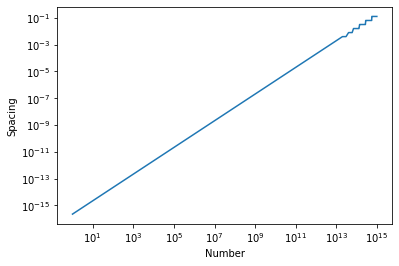

In [64]:
import matplotlib.pyplot as plt

range = np.linspace(1,1e15,100)
space = np.spacing(range)

plt.loglog(range,space)
plt.xlabel("Number")
plt.ylabel("Spacing")

There is still more complexity to floating point numbers, however. Mainly, there are reserved cases to express different numbers. The first are subnormal numbers, for which e=0. In this case, we get

$n=(-1)^s2^{-1022}(0+f)$.

The concept of NaN is stored with an $e=2047$ and $f\neq0$. Converslely, positive infinity is stored with $e=2047$, $f=0$, and $s=0$, while negative infinity is stored with $e=2047$, $f=0$, and $s=1$.


##Section 9.3: Round-Off Errors

As previouslt stated, there are gaps when dealing with floating point numbers. This came from the fact that we have a finite number of bits in which to store numbers. This means that numbers for which we would need and infinite number of digits to represent, a finite number must suffice. This leads to some quirks in floating point arithmatic, such as

In [78]:
(0.0055-0.005) == 0.0005

False

Note that this is not what we would expect. One way of getting around this issue is that we could instead check that the difference between the calculated and expected answer is smaller than some tolerence, such as

In [84]:
print((0.0055-0.005) - 0.0005 == 0)
print((0.0055-0.005) - 0.0005 < 1e-10)

False
True


One thing of note is that if we repeat a calculation many times, that this error will compund. This can be seen in the following plot

0.9999999999996527


False

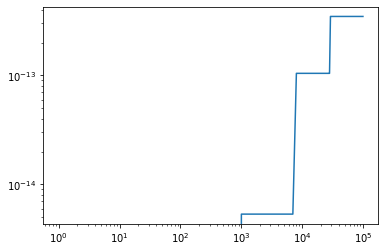

In [33]:
import numpy as np
import matplotlib.pyplot as plt

iter = range(1,int(1e5),int(1e3))
result = []

for i in iter:
  value = 1.0
  for j in range(i):
    value = value + 1/7
  for j in range(i):
    value = value - 1/7
  result.append(np.abs(1-value))





plt.loglog(iter,result)
print(value)

value == 1

We have thus seen how computers and humans differ in the way we write numbers. This is something that we must keep in mind while writing our programs, as while it will usually not be too large, we see that by compounding enough times, the error can begin to grow.